In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

(607, 910)


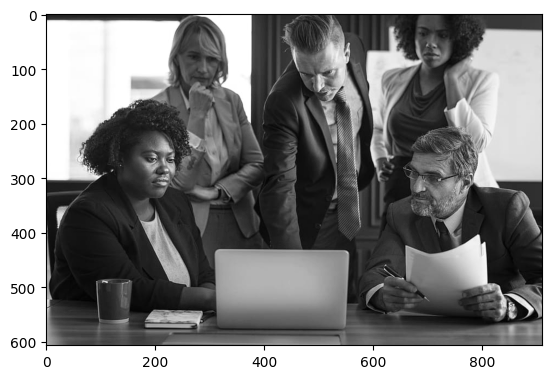

In [37]:
image_path = '/home/mtumalan/Desktop/Repos/Clases/ConcentracionIA/Octavio(Imagenes)/DL_Data_sets/images/business_people.jpg'
image = cv2.imread(image_path)

if image is not None:
    gray_road = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    plt.imshow(gray_road, cmap='gray')
    print(gray_road.shape)
else:
    print(f"Error: Unable to load image at {image_path}")


In [58]:
def apply_filter(image, kernel):
    output = np.zeros_like(image, dtype=float)

    for h in range(1, len(image) - 1):
        for w in range(1, len(image[0]) - 1):
            output1 = kernel[0,0] * image[h-1,w-1]
            output2 = kernel[0,1] * image[h-1,w]
            output3 = kernel[0,2] * image[h-1,w+1]
            output4 = kernel[1,0] * image[h,w-1]
            output5 = kernel[1,1] * image[h,w]
            output6 = kernel[1,2] * image[h,w+1]
            output7 = kernel[2,0] * image[h+1,w-1]
            output8 = kernel[2,1] * image[h+1,w]
            output9 = kernel[2,2] * image[h+1,w+1]

            output[h,w] = output1 + output2 + output3 + output4 + output5 + output6 + output7 + output8 + output9

    output = np.clip(output, 0, 255)
    return output

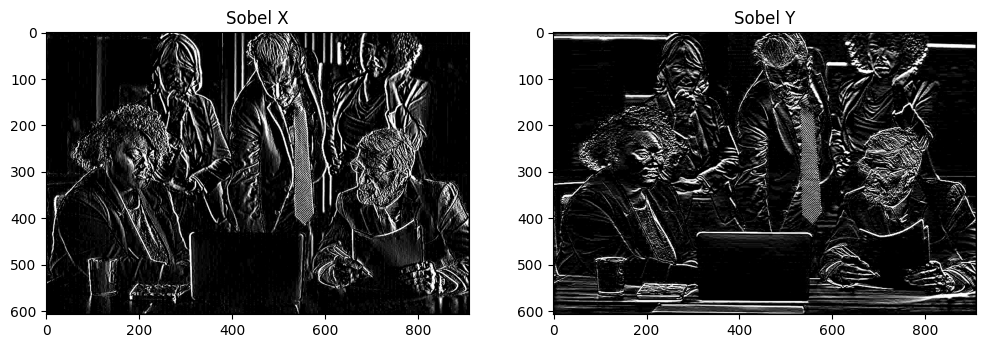

In [59]:
sobel_y = np.array([[ -1, -10, -1],
                   [ 0, 0, 0],
                   [ 1, 10, 1]])

sobel_x = np.array([[ -1, 0, 1],
                   [ -10, 0, 10],
                   [ -1, 0, 1]])

sobel_x_applied = apply_filter(gray_road, sobel_x)
sobel_y_applied = apply_filter(gray_road, sobel_y)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Sobel X')
plt.imshow(sobel_x_applied, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Sobel Y')
plt.imshow(sobel_y_applied, cmap='gray')

plt.show()